# Linear Fit using SGD without using Keras

In [4]:
import os,sys, math, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function,division
from ipywidgets import interact,interactive,fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%matplotlib inline
%precision 4
np.set_printoptions(precision=4, linewidth=100)


In [9]:
# define a linear equation
def lin(a,b,x): return a*x+b
a=3
b=8

In [28]:
#generate some random samples
n=30
x = random(n)
y = lin(a,b,x)
n = len(x)

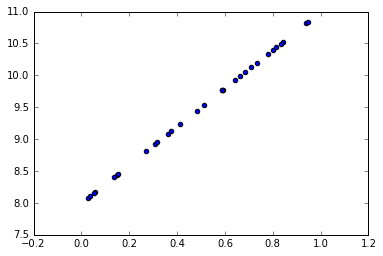

In [29]:
# See the scatter plot for x vs y
plt.scatter(x,y)

In [45]:
# Define the loss function and the average loss function
def sse(y, y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): 
    abc = loss(y,a,b,x)
    return np.sqrt(abc/n)

In [47]:
a_guess = -1
b_guess = 1
avg_loss(y, a_guess, b_guess, x)

9.0482

In [50]:
# define the sgd update method and update the weights x times to optimize the weights
lr = 0.01
def update():
    global a_guess,b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2* (y_pred - y)
    dyda = x * dydb
    a_guess = a_guess - lr * dyda.mean()
    b_guess = b_guess - lr * dydb.mean()

In [55]:
# Animate the whole line fitting curve - Reusable code.
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): 
        update()
        return line,
ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)
ani


RuntimeError: No MovieWriters available!

# Lesson 2 - Linear Fit using SGD using Keras